In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

datasets={}
for dirname, _, filenames in os.walk('/project_ghent/raman/netflow_datasets'):
    for filename in filenames:
        if filename.endswith("parquet"):
            datasets[filename.replace(".parquet","")]=pd.read_parquet(os.path.join(dirname, filename))
            
            
for k,v in datasets.items():
    print(v.Attack.unique())
    
    
for ds,data in datasets.items():
    ddos=data[data['Attack'].str.contains("ddos",case=False)]
    dos=data[data['Attack'].str.contains("dos",case=False)]
    dos.drop(index=ddos.index,inplace=True)
    dos.Attack="DoS"#uniform name
    benign=data[data['Attack'] == 'Benign']
    
    size_dos=dos.shape[0]
    size_benign= benign.shape[0]
    
    if size_dos>size_benign:
        #downsample attack
        dos= dos.sample(size_benign)
    else:
        #downsample benign
        benign = benign.sample(size_dos)
    
    data = pd.concat(objs=[dos, benign])
    
    # random forest classifier works internally with float32 so values too big will give errors
    data = data[data['SRC_TO_DST_SECOND_BYTES'] <= np.finfo(np.float32).max]
    data = data[data['DST_TO_SRC_SECOND_BYTES'] <= np.finfo(np.float32).max]
    
    data=data.drop(columns=['L4_SRC_PORT', 'L4_DST_PORT']) # dropping metadata
    datasets[ds]=data
    
for k,v in datasets.items():
    print(v.Attack.value_counts())
    
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
for k,v in datasets.items():
    x=v[v.columns[:-2]]
    y=v[v.columns[-2]]
    X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    stratify=y, 
                                                    test_size=0.75)
    datasets[k]={"X_train":X_train, "X_test":X_test, "y_train":y_train, "y_test":y_test}
    print(f"{k}: {y_train.shape[0]} {y_test.shape[0]}")

similar_dos={}
similar_dos["NF-BoT-IoT-V2_NF-CSE-CIC-IDS2018-V2"]=["FTP_COMMAND_RET_CODE","DNS_QUERY_TYPE", "DNS_TTL_ANSWER", "DNS_QUERY_ID", "NUM_PKTS_1024_TO_1514_BYTES"]
similar_dos["NF-ToN-IoT-V2_NF-BoT-IoT-V2"]=["FTP_COMMAND_RET_CODE","RETRANSMITTED_OUT_BYTES", "RETRANSMITTED_OUT_PKTS", "NUM_PKTS_1024_TO_1514_BYTES", "NUM_PKTS_512_TO_1024_BYTES"]
similar_dos["NF-ToN-IoT-V2_NF-CSE-CIC-IDS2018-V2"]= ["FTP_COMMAND_RET_CODE", "NUM_PKTS_1024_TO_1514_BYTES"]
similar_dos["NF-UNSW-NB15-V2_NF-BoT-IoT-V2"]=["DNS_TTL_ANSWER", "DNS_QUERY_TYPE"]
similar_dos["NF-UNSW-NB15-V2_NF-CSE-CIC-IDS2018-V2"]=["DNS_TTL_ANSWER", "DNS_QUERY_TYPE"]

similar_ddos={}
similar_ddos["NF-BoT-IoT-V2_NF-CSE-CIC-IDS2018-V2"]=["FTP_COMMAND_RET_CODE","DNS_QUERY_TYPE", "DNS_TTL_ANSWER", "DNS_QUERY_ID","RETRANSMITTED_OUT_BYTES","RETRANSMITTED_OUT_PKTS","RETRANSMITTED_IN_PKTS", "NUM_PKTS_1024_TO_1514_BYTES"]
similar_ddos["NF-ToN-IoT-V2_NF-CSE-CIC-IDS2018-V2	"]=["FTP_COMMAND_RET_CODE"]
similar_ddos["NF-ToN-IoT-V2_NF-BoT-IoT-V2"]=["FTP_COMMAND_RET_CODE"]
    
dataset_names = datasets.keys()

['ransomware' 'Benign' 'xss' 'scanning' 'password' 'dos' 'ddos'
 'injection' 'mitm' 'backdoor']
['Benign' 'Exploits' 'Generic' 'Fuzzers' 'Backdoor' 'DoS' 'Reconnaissance'
 'Shellcode' 'Worms' 'Analysis']
['DoS' 'DDoS' 'Reconnaissance' 'Benign' 'Theft']
['SSH-Bruteforce' 'Benign' 'DDoS attacks-LOIC-HTTP' 'DDOS attack-HOIC'
 'DoS attacks-Slowloris' 'DoS attacks-Hulk' 'FTP-BruteForce'
 'Infilteration' 'Bot' 'DoS attacks-GoldenEye' 'Brute Force -Web'
 'DoS attacks-SlowHTTPTest' 'SQL Injection' 'DDOS attack-LOIC-UDP'
 'Brute Force -XSS']


/tmp/ipykernel_201/3339726977.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dos.drop(index=ddos.index,inplace=True)
/tmp/ipykernel_201/3339726977.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dos.Attack="DoS"#uniform name
/tmp/ipykernel_201/3339726977.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dos.drop(index=ddos.index,inplace=True)
/tmp/ipykernel_201/3339

Attack
DoS       654359
Benign    654341
Name: count, dtype: int64
Attack
DoS       4172
Benign    4172
Name: count, dtype: int64
Attack
DoS       129437
Benign    129437
Name: count, dtype: int64
Attack
DoS       483999
Benign    483996
Name: count, dtype: int64
NF-ToN-IoT-V2: 327175 981525
NF-UNSW-NB15-V2: 2086 6258
NF-BoT-IoT-V2: 64718 194156
NF-CSE-CIC-IDS2018-V2: 241998 725997


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from os import cpu_count
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score, accuracy_score
def inter_dataset():
    prepared_result_rows = []
    for dataset_train in dataset_names:
        for dataset_test in dataset_names:
                common_features=[]
                if dataset_train+"_"+dataset_test in similar_dos.keys():
                    common_features=similar_dos[dataset_train+"_"+dataset_test]
                if dataset_test+"_"+dataset_train in similar_dos.keys():
                    common_features=similar_dos[dataset_test+"_"+dataset_train]
                if len(common_features)==0:
                    prepared_result_row = [
                                dataset_train,
                                dataset_test,
                                -1,
                                -1,
                                -1,
                                -1,
                                -1,
                                -1,            
                    ]
                    print(prepared_result_row)
                    prepared_result_rows.append(prepared_result_row)
                    continue
                accuracies = []
                precisions = []
                recalls = []
                for i in range(10):
                    clf=RandomForestClassifier()
                    params = {
                                        'bootstrap': True,
                                        'max_features': 'sqrt',
                                        'min_impurity_decrease': 0.0,
                                        'min_samples_leaf': 2,
                                        'n_estimators': 10,
                                        'max_samples': 0.5,
                                        'criterion': 'entropy',
                                        'n_jobs': -1,
                                        }
                    clf.set_params(**params)
                    clf.fit(X=datasets[dataset_train]["X_train"][common_features], y=datasets[dataset_train]["y_train"])
                    outputs = clf.predict(X=datasets[dataset_test]["X_test"][common_features])

                    accuracies.append(accuracy_score(y_true=datasets[dataset_test]["y_test"], y_pred=outputs))
                    precisions.append(precision_score(y_true=datasets[dataset_test]["y_test"], y_pred=outputs, zero_division=0))
                    recalls.append(recall_score(y_true=datasets[dataset_test]["y_test"], y_pred=outputs, zero_division=0))
                prepared_result_row = [
                                dataset_train,
                                dataset_test,
                                round(np.mean(accuracies), 3),
                                round(np.std(accuracies), 3),
                                round(np.mean(precisions), 3),
                                round(np.std(precisions), 3),
                                round(np.mean(recalls), 3),
                                round(np.std(recalls), 3),            
                ]
                print(prepared_result_row)
                prepared_result_rows.append(prepared_result_row)
    return prepared_result_rows

           
def make_plots(attack, model, name):

    fig, ax = plt.subplots(figsize=(15, 15))

    stacked_array_norm = np.stack([row[2] for row in prepared_result_rows])
    stacked_array_norm=stacked_array_norm.reshape(4,-1)
    # create heatmap with annotations
    sns.heatmap(stacked_array_norm, annot=True, fmt='.4f', cmap='YlGnBu', cbar=True, square=True, linewidths=.5, ax=ax)

    # set title and labels
    ax.set_title(f"inter-dataset generalization {attack} accuracy {name} dropped")
    ax.set_xlabel('test')
    ax.set_ylabel('train')

    # set x and y ticklabels to categorical labels
    ax.set_xticklabels(dataset_names)
    ax.set_yticklabels(dataset_names, rotation=0, ha='right')
    plt.subplots_adjust(left=0.2)
    # plt.savefig(f"/project_ghent/raman/images/accuracy_heatmap_{attack}_{model}_{name}_dropped.png")


    fig, ax = plt.subplots(figsize=(15, 15))

    stacked_array_norm = np.stack([row[4] for row in prepared_result_rows])
    stacked_array_norm=stacked_array_norm.reshape(4,-1)
    # create heatmap with annotations
    sns.heatmap(stacked_array_norm, annot=True, fmt='.4f', cmap='YlGnBu', cbar=True, square=True, linewidths=.5, ax=ax)

    # set title and labels
    ax.set_title(f"inter-dataset generalization {attack} precision {name} dropped")
    ax.set_xlabel('test')
    ax.set_ylabel('train')

    # set x and y ticklabels to categorical labels
    ax.set_xticklabels(dataset_names)
    ax.set_yticklabels(dataset_names, rotation=0, ha='right')
    plt.subplots_adjust(left=0.2)
    # plt.savefig(f"/project_ghent/raman/images/precision_heatmap_{attack}_{model}_{name}_dropped.png")



    fig, ax = plt.subplots(figsize=(15, 15))

    stacked_array_norm = np.stack([row[6] for row in prepared_result_rows])
    stacked_array_norm=stacked_array_norm.reshape(4,-1)
    # create heatmap with annotations
    sns.heatmap(stacked_array_norm, annot=True, fmt='.4f', cmap='YlGnBu', cbar=True, square=True, linewidths=.5, ax=ax)

    # set title and labels
    ax.set_title(f"Inter-dataset generalization {attack} recall {name} dropped")
    ax.set_xlabel('test')
    ax.set_ylabel('train')

    # set x and y ticklabels to categorical labels
    ax.set_xticklabels(dataset_names)
    ax.set_yticklabels(dataset_names, rotation=0, ha='right')
    plt.subplots_adjust(left=0.2)
    # plt.savefig(f"/project_ghent/raman/images/recall_heatmap_{attack}_{model}_{name}_dropped.png")

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 6))

    # Plot 1
    ax1 = axes[0]
    stacked_array_norm = np.stack([row[2] for row in prepared_result_rows])
    stacked_array_norm = stacked_array_norm.reshape(4, -1)
    sns.heatmap(stacked_array_norm, annot=True, fmt='.4f', cmap='YlGnBu', cbar=True, square=True, linewidths=.5, ax=ax1)
    ax1.set_title(f"Inter-dataset generalization {attack} accuracy {name} dropped",y=1.1)
    ax1.set_xlabel('Test')
    ax1.set_ylabel('Train')
    ax1.set_xticklabels(dataset_names,rotation=-45)
    ax1.set_yticklabels(dataset_names, rotation=0, ha='right')
    plt.subplots_adjust(wspace=0.4)

    # Plot 2
    ax2 = axes[1]
    stacked_array_norm = np.stack([row[4] for row in prepared_result_rows])
    stacked_array_norm = stacked_array_norm.reshape(4, -1)
    sns.heatmap(stacked_array_norm, annot=True, fmt='.4f', cmap='YlGnBu', cbar=True, square=True, linewidths=.5, ax=ax2)
    ax2.set_title(f"Inter-dataset generalization {attack} precision {name} dropped",y=1.1)
    ax2.set_xlabel('Test')
    ax2.set_ylabel('Train')
    ax2.set_xticklabels(dataset_names,rotation=-45)
    ax2.set_yticklabels(dataset_names, rotation=0, ha='right')

    # Plot 3
    ax3 = axes[2]
    stacked_array_norm = np.stack([row[6] for row in prepared_result_rows])
    stacked_array_norm = stacked_array_norm.reshape(4, -1)
    sns.heatmap(stacked_array_norm, annot=True, fmt='.4f', cmap='YlGnBu', cbar=True, square=True, linewidths=.5, ax=ax3)
    ax3.set_title(f"Inter-dataset generalization {attack} recall {name} dropped",y=1.1)
    ax3.set_xlabel('Test')
    ax3.set_ylabel('Train')
    ax3.set_xticklabels(dataset_names,rotation=-45)
    ax3.set_yticklabels(dataset_names, rotation=0, ha='right')

    # Save the combined plot
    # plt.savefig(f"/project_ghent/raman/images/combined_heatmaps_{attack}_{model}_{name}_dropped.png")

# print("drop contaminants")
# for k,v in datasets.items():
#     print(datasets[k]["X_train"].shape)
#     drop_features(k,True)
#     print(datasets[k]["X_train"].shape)

In [5]:
prepared_result_rows=inter_dataset()

['NF-ToN-IoT-V2', 'NF-ToN-IoT-V2', -1, -1, -1, -1, -1, -1]
['NF-ToN-IoT-V2', 'NF-UNSW-NB15-V2', -1, -1, -1, -1, -1, -1]
['NF-ToN-IoT-V2', 'NF-BoT-IoT-V2', 0.584, 0.0, 0.546, 0.0, 0.999, 0.0]
['NF-ToN-IoT-V2', 'NF-CSE-CIC-IDS2018-V2', 0.658, 0.0, 0.594, 0.0, 1.0, 0.0]
['NF-UNSW-NB15-V2', 'NF-ToN-IoT-V2', -1, -1, -1, -1, -1, -1]
['NF-UNSW-NB15-V2', 'NF-UNSW-NB15-V2', -1, -1, -1, -1, -1, -1]
['NF-UNSW-NB15-V2', 'NF-BoT-IoT-V2', 0.503, 0.008, 0.453, 0.151, 0.9, 0.3]
['NF-UNSW-NB15-V2', 'NF-CSE-CIC-IDS2018-V2', 0.669, 0.025, 0.602, 0.018, 1.0, 0.0]
['NF-BoT-IoT-V2', 'NF-ToN-IoT-V2', 0.535, 0.0, 0.518, 0.0, 1.0, 0.0]
['NF-BoT-IoT-V2', 'NF-UNSW-NB15-V2', 0.521, 0.0, 0.511, 0.0, 0.98, 0.0]
['NF-BoT-IoT-V2', 'NF-BoT-IoT-V2', -1, -1, -1, -1, -1, -1]
['NF-BoT-IoT-V2', 'NF-CSE-CIC-IDS2018-V2', 0.91, 0.0, 0.848, 0.0, 1.0, 0.0]
['NF-CSE-CIC-IDS2018-V2', 'NF-ToN-IoT-V2', 0.524, 0.0, 0.512, 0.0, 1.0, 0.0]
['NF-CSE-CIC-IDS2018-V2', 'NF-UNSW-NB15-V2', 0.521, 0.0, 0.511, 0.0, 0.98, 0.0]
['NF-CSE-CIC-IDS2

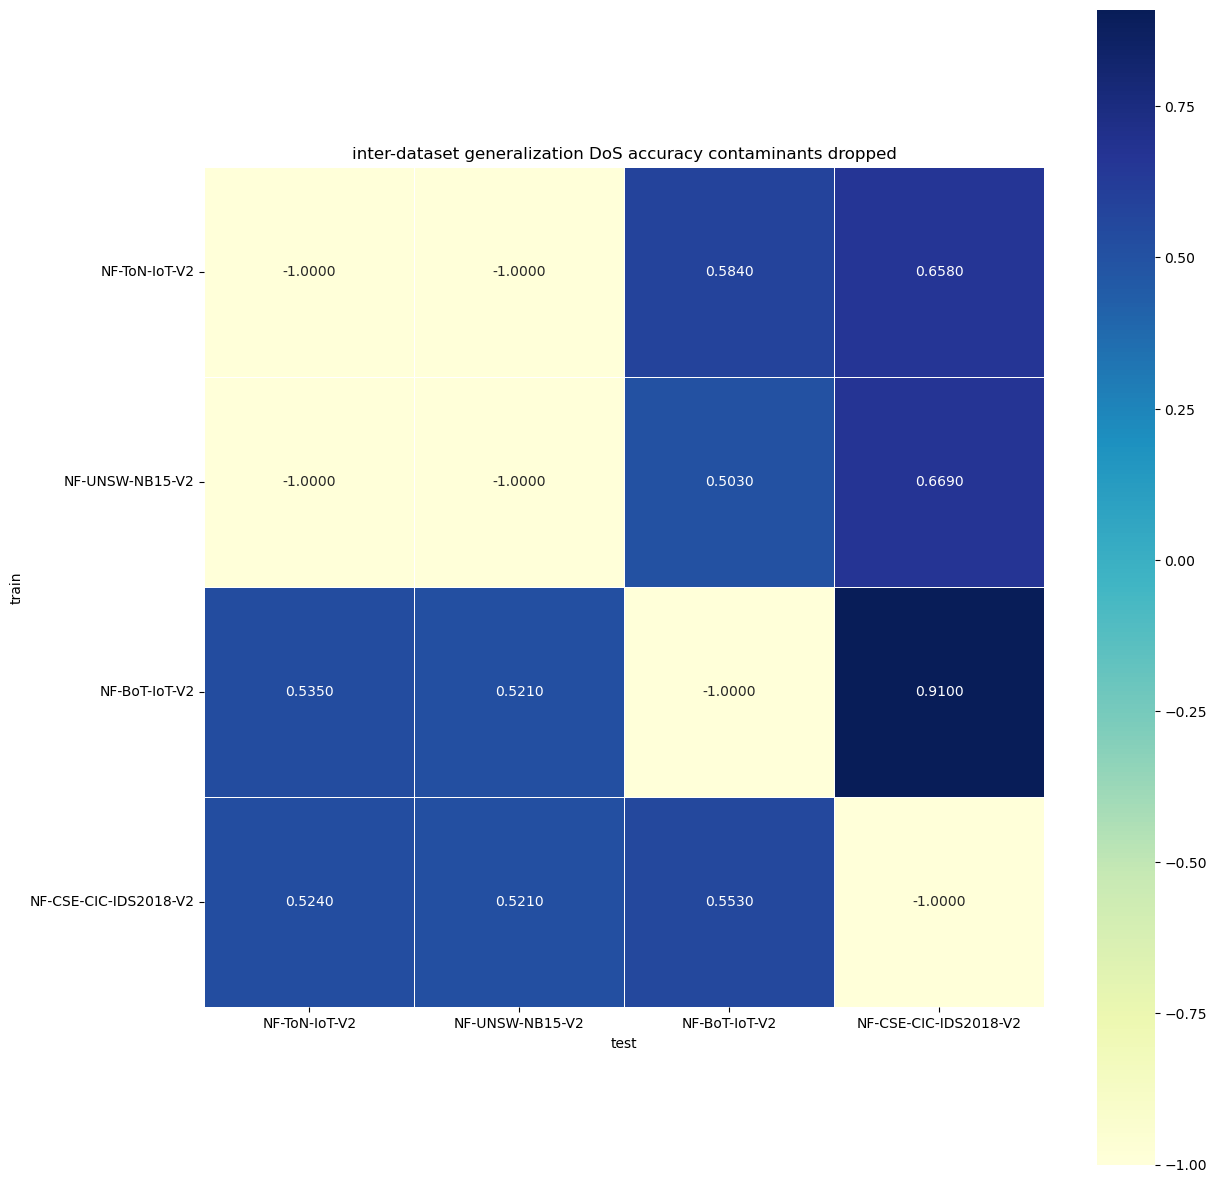

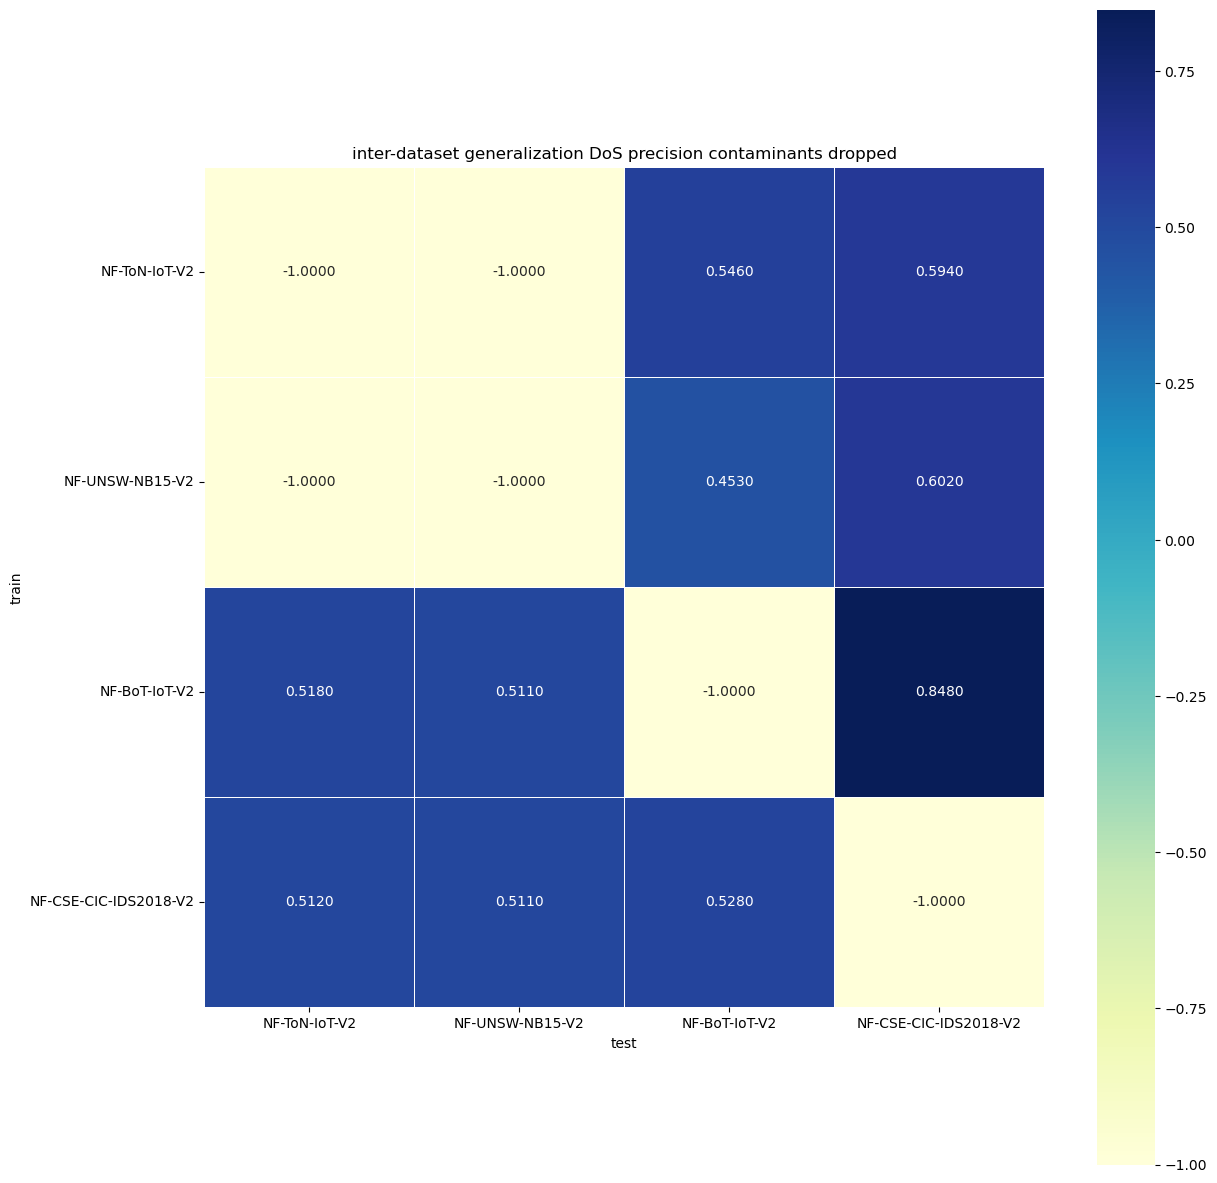

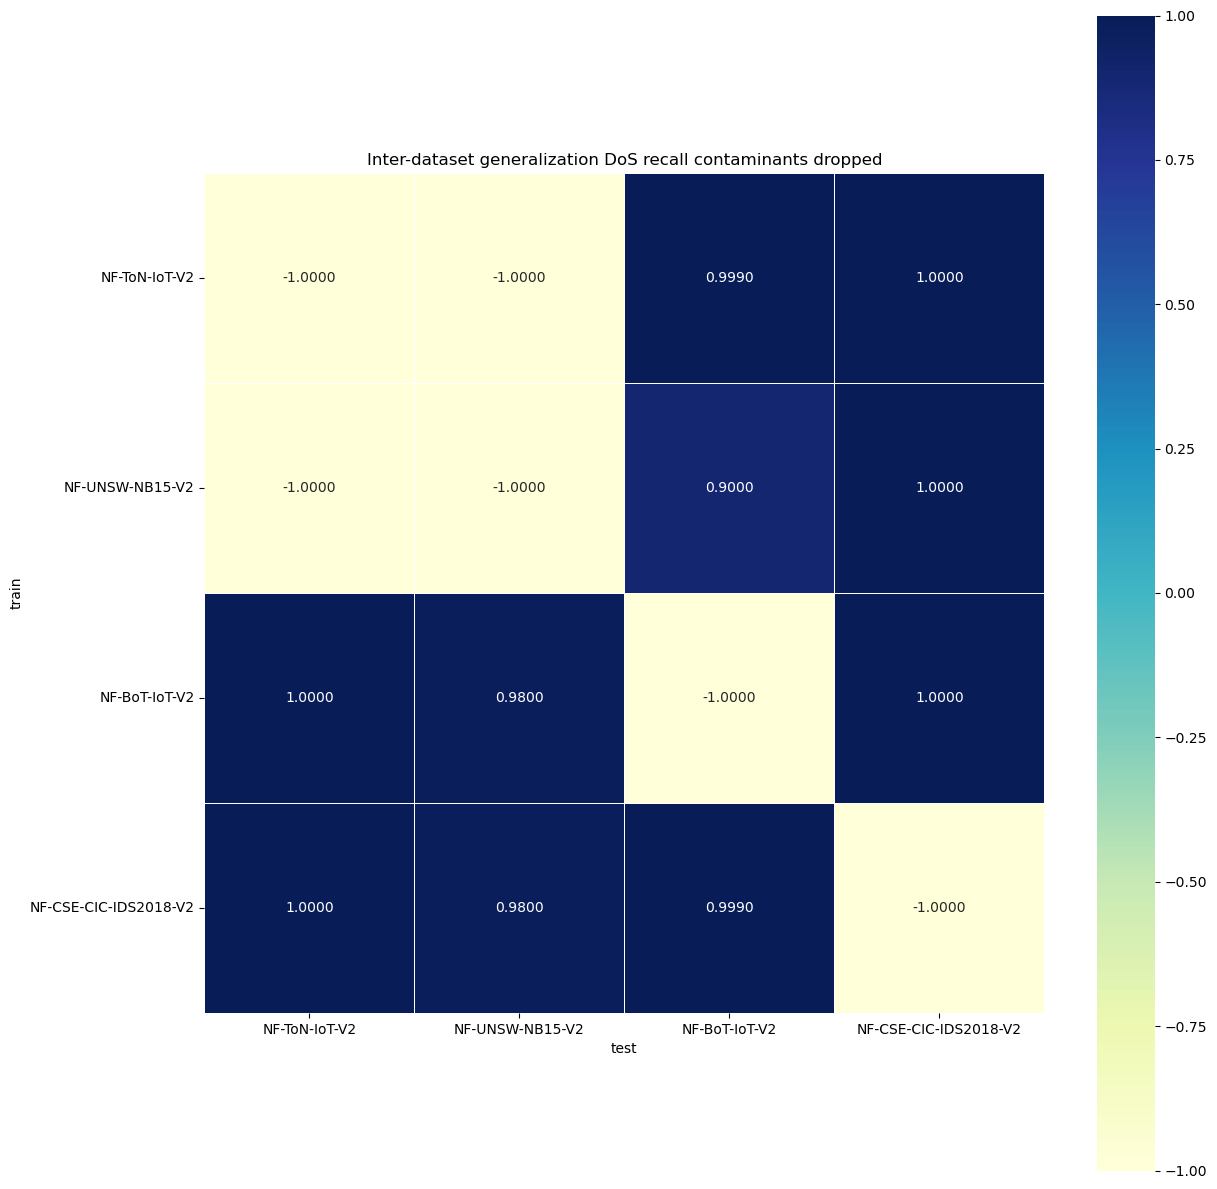

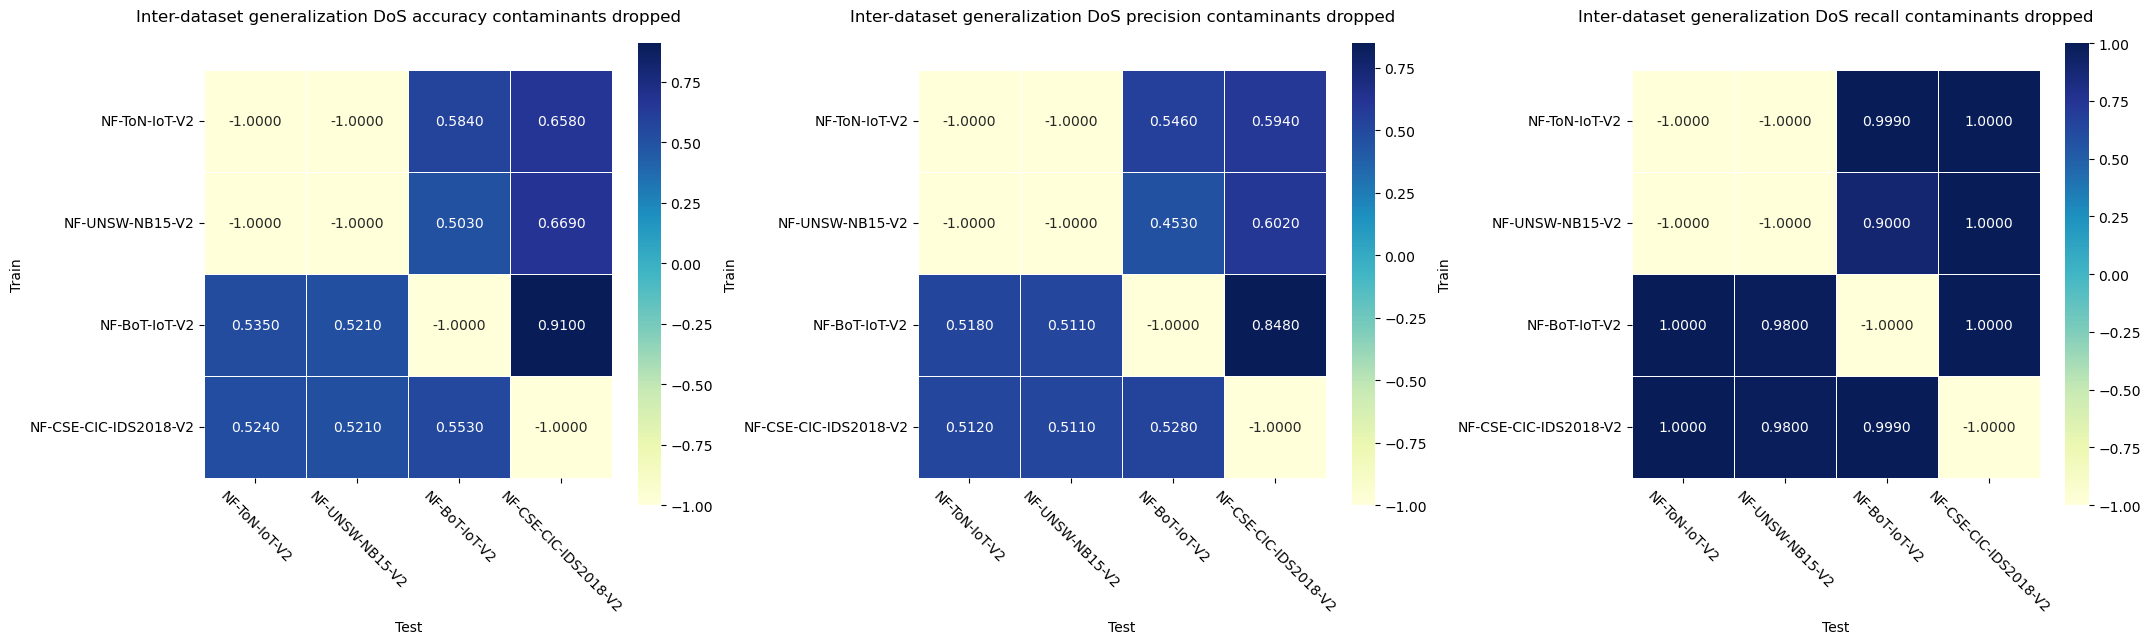

In [6]:
make_plots("DoS", "rf", "contaminants")


# print("also drop generalization zone contaminants")
# for k,v in datasets.items():
#     print(datasets[k]["X_train"].shape)
#     drop_features(k,False)
#     print(datasets[k]["X_train"].shape)
    
# prepared_result_rows=inter_dataset()

# make_plots("DoS", "rf", "generalization contaminants")